In [5]:
import os
import sys
import numpy as np
import torch
import ast
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [6]:
sys.path.append("../authorship_attribution/")
sys.path.append("../obfuscated_ast_similarity//")

In [7]:
import model as ast_model
import train as ast_train
import utilities as ast_utilities
import obfuscation
import json
import obfuscated_trainer

In [8]:
original_path = "../authorship_attribution/experiments/GCJ-108/plain/"

In [9]:
# complete_model = ast_utilities.load_plain_model(complete_model, )
# model_params = json.loads(open(os.path.join(path, "components", "ast_encoder_params.json")).read())
model_params = json.loads(open(os.path.join(original_path, "best_state", "components", "ast_encoder_params.json")).read())


In [19]:
ast_encoder = ast_model.ASTEncoder(model_params)
ast_encoder.load(os.path.join(original_path, "best_state", "components"))

In [20]:
batcher = obfuscated_trainer.Batcher({}, 0.8)
batcher.load_from_attribution_batcher(original_path)
# batcher.load_from_attribution_batcher("../authorship_attribution/experiments/GCJ-108/regularized-sep-coef-names/")
# batcher.load(original_path)

In [21]:
# batcher.train_data

In [22]:
# data = ast_utilities.read_all_gcj()

In [23]:
# data = ast_utilities.filter_by_count(data, 15, 1000)
# batcher = obfuscated_trainer.Batcher(data, 0.8)

In [24]:


obfuscation_params = {
    "max_patches_to_body":5,
    "modify_add_patches":0.5,
    "max_frac_to_insert":0.3,
#     'max_n_insertions':5,
    "add_functions":False
}



In [25]:
long_names = obfuscated_trainer.order_names_by_count(batcher)

Train:
same_problem_user nan
same_user_original 0.8226741845915392
same_user 0.8226741845915392


/home/pmazaev/torch/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pmazaev/torch/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Test:
same_problem_user nan
same_user_original 0.6806923918992884
same_user 0.6806923918992884


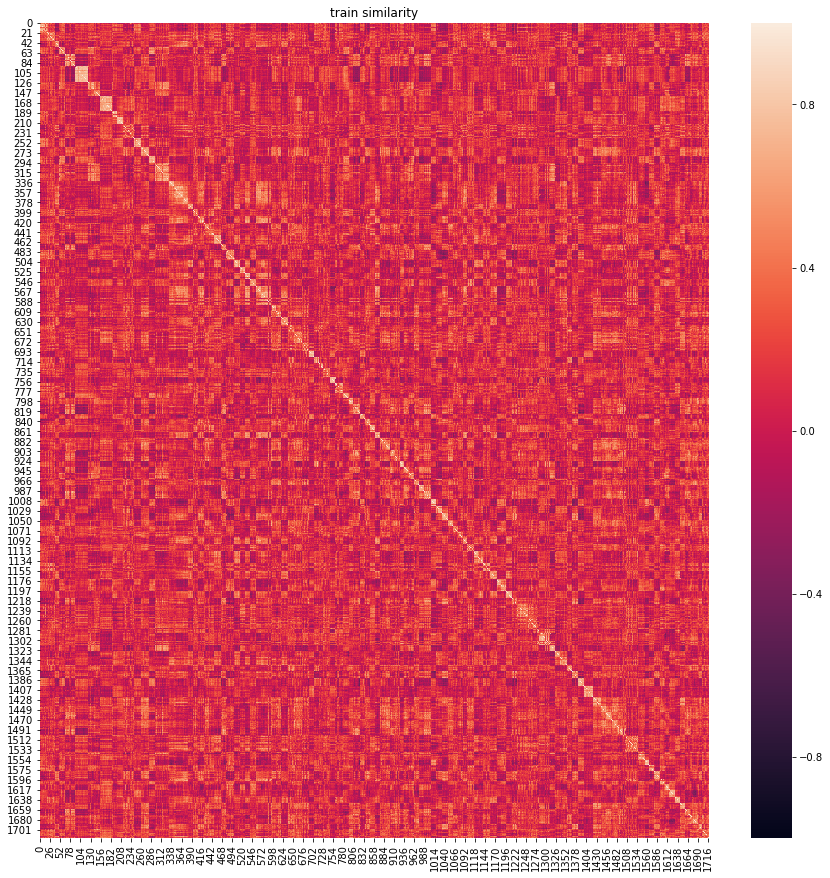

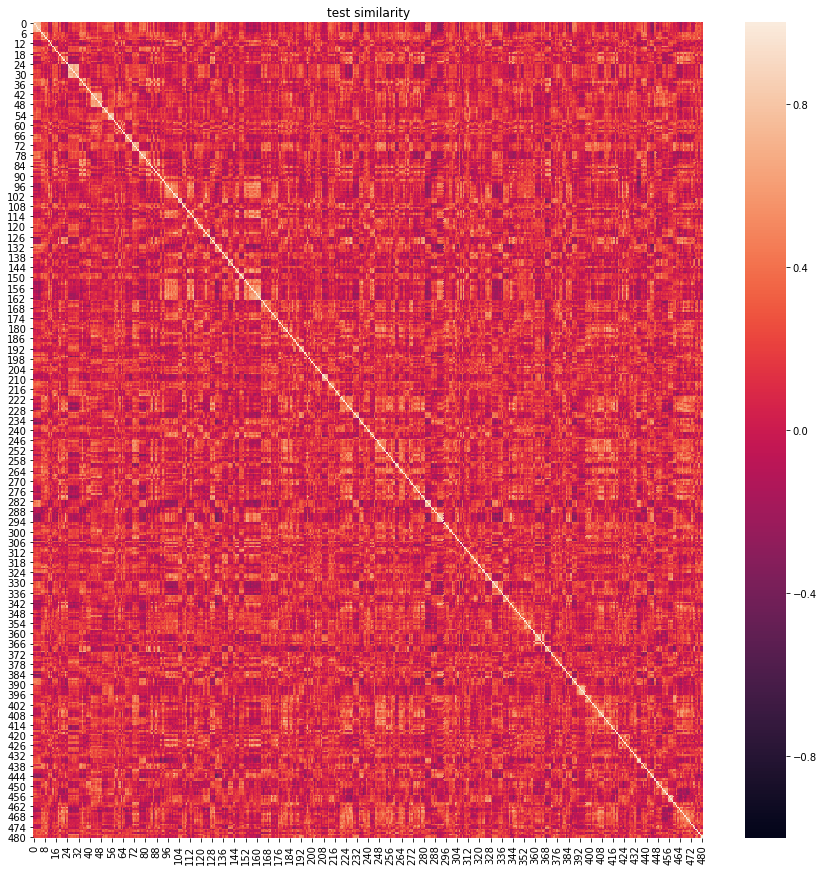

In [18]:
_ = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, max_for_user=100, n_obfuscated=0)

In [15]:

# trainer_params = dict(
#     n_epochs = 200,
#     n_obfuscated = 25,
#     validate_every = 5,
#     n_problems_validation = 50,
#     validate_n_problems = 50,
#     train_n_problems = 50,
#     regularizer_coef = 0.001,
#     n_adversarial = 100,
#     adversarial_coef = 1
# )


trainer_params = dict(
    n_epochs = 200,
    n_obfuscated = 25,
    validate_every = 5,
    n_problems_validation = 50,
    validate_n_problems = 10,
    train_n_problems = 10,
    regularizer_coef = 0.000,
    n_adversarial = 10,
    n_samples_for_adversarial = 3,
    adversarial_coef = 1
)


In [16]:
track_metric = {
    "metric_name":"loss",
    "function":ast_train.validate_max
}

In [18]:
path = "./experiments/gcj_108_108/pure/no_names_mixing"
if os.path.exists(path):
    raise ValueError()

ValueError: 

In [28]:
trainer = obfuscated_trainer.MixingTrainer(ast_encoder, torch.optim.Adam(ast_encoder.parameters()), path=path, track_metric=track_metric)

In [29]:
# trainer.load(os.path.join(path, "last_state"))

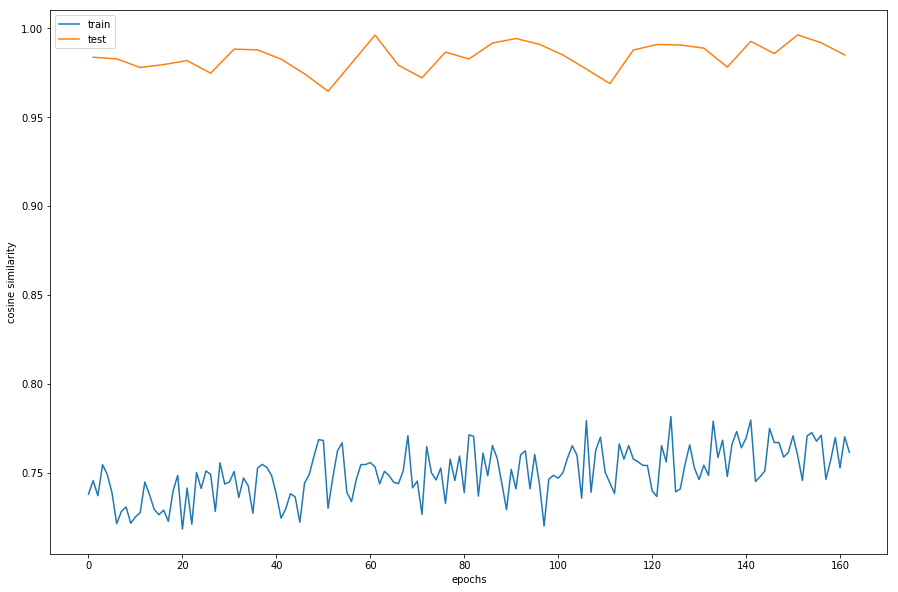

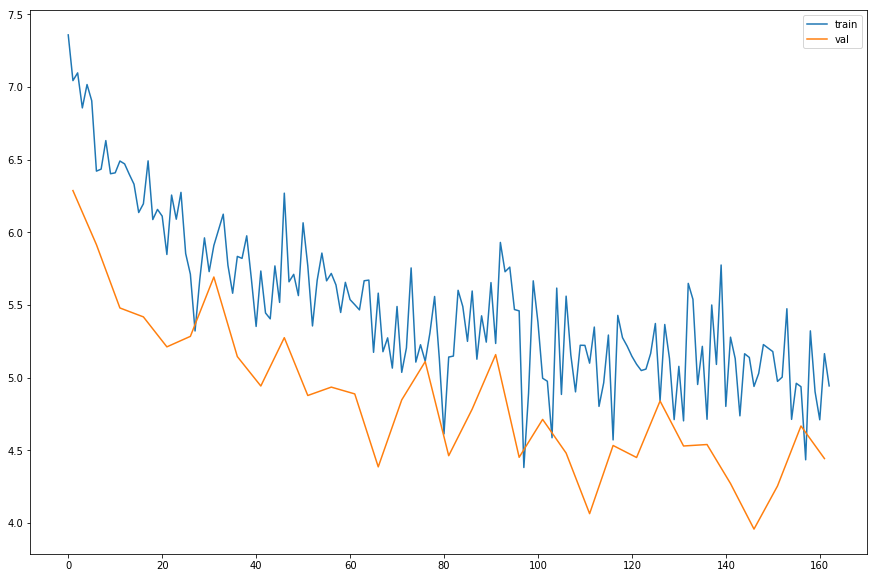

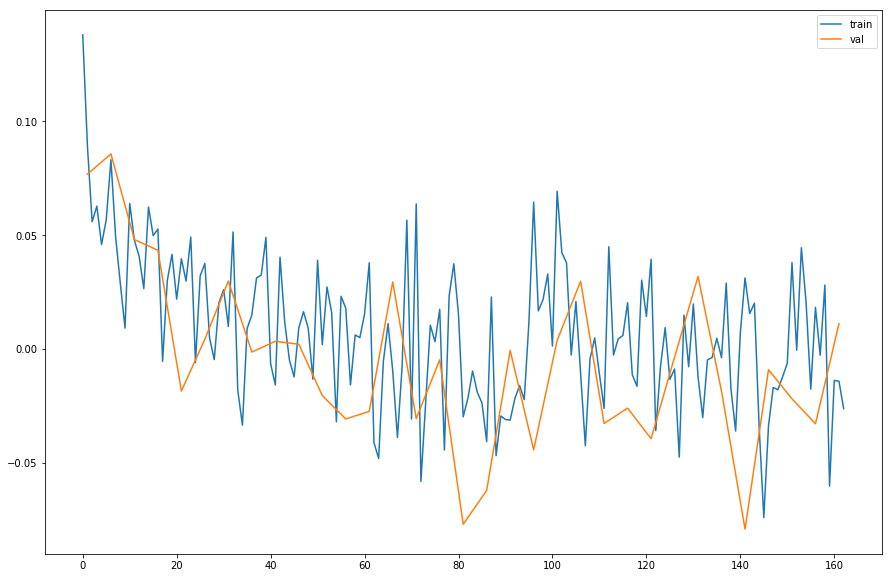

KeyboardInterrupt: 

In [31]:
trainer.train(batcher, trainer_params, obfuscation_params)

In [ ]:
# validation_result = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, max_for_user=100, n_obfuscated=0)

Train:
same_user_original 0.5160792989634246
same_user 0.5160792989634246
same_problem_user nan


/home/pmazaev/torch/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pmazaev/torch/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Test:
same_user_original 0.551368363437329
same_user 0.551368363437329
same_problem_user nan


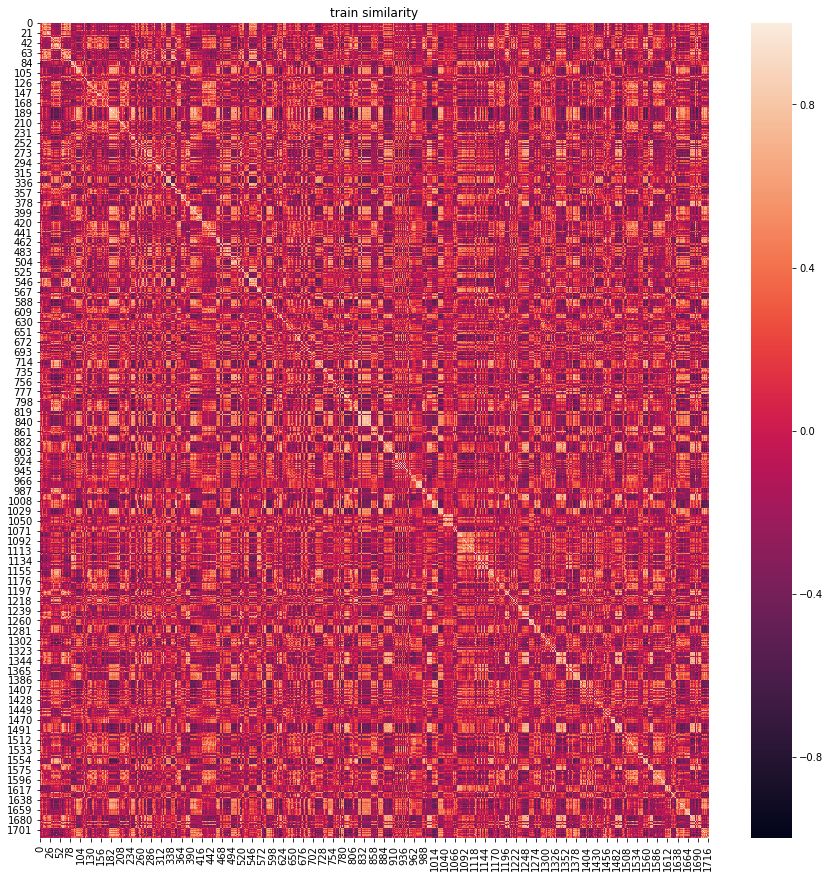

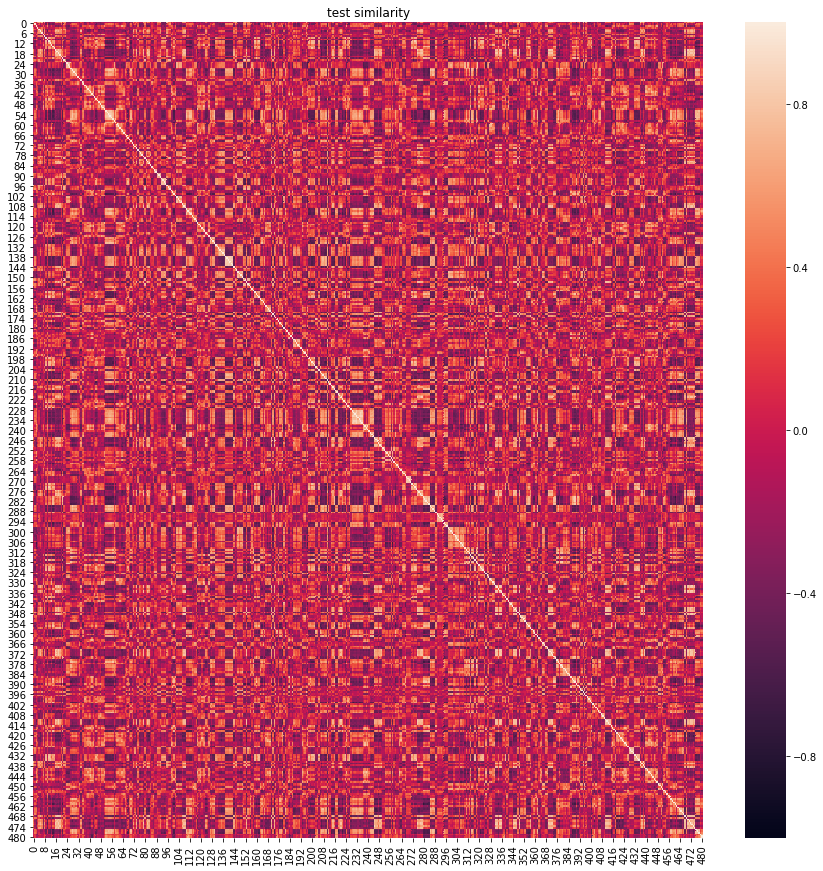

In [33]:
validation_result = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, max_for_user=100, n_obfuscated=0)

In [21]:
import gc
gc.collect()

11287

In [29]:
# validation_result = _

In [33]:
# validation_result[0]["codes"]

In [34]:
cur = validation_result[1]
for row_id, row in enumerate(cur['sim']):
    asort = (-row).argsort()
    best = asort[1]
    
    if cur['back_indices'][row_id][0] != cur['back_indices'][best][0]:
        print(cur['codes'][row_id])
        print("\n``````````````````````````````````````````````````````\n")
        print(cur['codes'][best])
        print("\n\n\n===================================================\n\n\n")

import sys
IMPOSSIBLE = []


def transpose(grid):
    return map(list, zip(*grid))


def find_grid(R, C, M):
    """Return a grid of a solution, if one exists, otherwise []

    Observations:
    * WLOG, C <= R (otherwise, take the transpose of a solution)
    * Trivial cases are:
      - M = 0 or  M = RC - 1
      - C = 1
      - (R, C) = (2, 2)
      - (R, C, M) = (3, 3, 2)
      - (C, M) = (2, 1)
    * If M >= C >= 2 and R >= 3, we can add a row of C mines to the bottom and consider M'=M-C, R'=R-1
    * The remaining cases are M <= R-2, and M + 1 == R == C >= 4, which are both solvable
    """
    if M == 0:
        grid = [['.' for c in xrange(C)] for r in xrange(R)]
        grid[0][0] = 'c'
        return grid
    elif M == R * C - 1:
        grid = [['*' for c in xrange(C)] for r in xrange(R)]
        grid[0][0] = 'c'
        return grid
    elif C > R:
        return transpose(find_grid(C, R, M))
    elif C == 1:
        return [['c']] + [['.'] for i in xrange(R - M - 1)] + [['*